In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [4]:
# y = wx + b
# y --> label yani fiyat
y = dataFrame["Fiyat"].values  #numpy array formatına çevir

# x --> feature yani bisiklet özellikleri
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

In [5]:
from sklearn.model_selection import train_test_split
#veri setini hem eğitim hem de test için ağırlıklı bi şekilde ikiye ayırmak için

#test_size --> test için ayrılacak veri yüzdesi %33
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [6]:
x_train

array([[1750.482746, 1750.778662],
       [1747.277403, 1749.647984],
       [1750.512058, 1748.444974],
       ...,
       [1748.268223, 1748.798416],
       [1753.324925, 1749.778418],
       [1748.195024, 1749.298745]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
#scaling --> tüm x değerlerini 0-1 arası değerlere ölçeklendirme

scaler = MinMaxScaler()
scaler.fit(x_train)      #ön hazırlık için uydur

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
x_train

array([[0.52320714, 0.60550034],
       [0.22536197, 0.49075659],
       [0.52593085, 0.36867243],
       ...,
       [0.31743041, 0.40454052],
       [0.78730657, 0.50399333],
       [0.31062865, 0.45531503]])

In [9]:
import tensorflow as tf
from tensorflow.keras import models   # model sınıfı
from tensorflow.keras import layers   # katman sınıfı

In [10]:
# Sinir Ağı Modeli Oluşturma

model = models.Sequential()

model.add(layers.Dense(4, activation="relu"))  #1.gizli katman ve 4 nöron
model.add(layers.Dense(4, activation="relu"))  #2.gizli katman ve 4 nöron
model.add(layers.Dense(4, activation="relu"))  #3.gizli katman ve 4 nöron

model.add(layers.Dense(1))   #çıkış katmanı

In [11]:
# optimizasyon
model.compile(optimizer="rmsprop", loss="mse")

In [12]:
# eğitme
model.fit(x_train,y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 572us/step - loss: 786264.3750
Epoch 2/250
21/21 [==============================] - 0s 762us/step - loss: 786024.6875
Epoch 3/250
21/21 [==============================] - 0s 762us/step - loss: 785742.8125
Epoch 4/250
21/21 [==============================] - 0s 762us/step - loss: 785406.2500
Epoch 5/250
21/21 [==============================] - 0s 762us/step - loss: 785041.9375
Epoch 6/250
21/21 [==============================] - 0s 762us/step - loss: 784649.6250
Epoch 7/250
21/21 [==============================] - 0s 572us/step - loss: 784216.7500
Epoch 8/250
21/21 [==============================] - 0s 762us/step - loss: 783735.1250
Epoch 9/250
21/21 [==============================] - 0s 762us/step - loss: 783202.9375
Epoch 10/250
21/21 [==============================] - 0s 762us/step - loss: 782616.0000
Epoch 11/250
21/21 [==============================] - 0s 762us/step - loss: 781963.5625
Epoch 12/250
21/21 [=====================

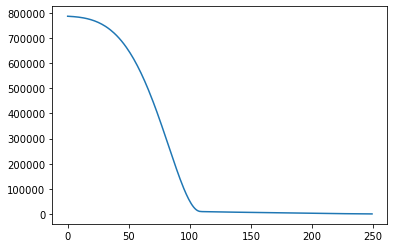

In [13]:
# Loss değerlerinin minimize olma eğrisi
loss = model.history.history["loss"]
axis = range(0,len(loss))
plt.plot(axis,loss)

In [14]:
# Loss kayıplarının değerlendirilmesi
# train ve test kayıpları ne kadar az olursa o kadar iyidir
# train ve test kayıplarının birbirine yakın değerler olması sağlıklıdır

trainLoss = model.evaluate(x_train,y_train,verbose=0)
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [15]:
trainLoss

544.71435546875

In [16]:
testLoss

569.54345703125

In [17]:
# Tahmin denemeleri

tahminler = model.predict(x_test)
# y --> fiyat tahminlerini numpy array şeklinde verir

tahminler.shape

(330, 1)

In [18]:
tahminler = pd.Series(tahminler.reshape(330,))
tahminler

0       604.519287
1       958.786560
2       791.092102
3      1028.104614
4       947.453674
          ...     
325    1192.929688
326     899.815979
327     765.805908
328     954.215393
329     792.958984
Length: 330, dtype: float32

In [19]:
# Tahminlerin gerçek değerlerle karşılaştırılması

compareFrame = pd.DataFrame(y_test,columns=["Gerçek Fiyat"])
compareFrame = pd.concat([compareFrame,tahminler],axis=1)
compareFrame.columns = ["Gerçek Fiyat","Tahmin"]

In [20]:
compareFrame

,Gerçek Fiyat,Tahmin
0,566.556564,604.519287
1,977.111437,958.786560
2,786.552347,791.092102
3,1042.940184,1028.104614
4,965.387674,947.453674
...,...,...
325,1245.401103,1192.929688
326,897.021611,899.815979
327,744.107388,765.805908
328,957.475775,954.215393


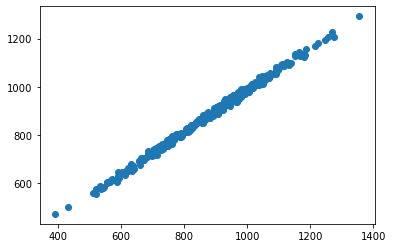

In [21]:
plt.scatter(y_test,tahminler)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Hata oranı kabul edilebilir mi?
from sklearn.metrics import mean_absolute_error

mean_absolute_error(compareFrame["Gerçek Fiyat"],compareFrame["Tahmin"])

18.99912551246567

In [24]:
dataFrame["Fiyat"].mean()

872.6778007425

In [25]:
# ortalama 872 liralık fiyatlardan ortalama 6.94 tl sapabilir

In [26]:
# modeli kaydetme
model.save("bisiklet_modeli.h5")

# modeli alma
# from tensorflow.keras.models import load_model
# my_model = load_model("bisiklet_modeli.h5")